#Регулярні вирази

При інтерпретації чи компіляції програм виявлення синтаксичних помилок відбувається дуже швидко, але напевно ми ще не задумувалися яким чином компілятор (інтерпретатор) їх знаходить. Пошук синтаксичних помилок у тексті програм виконується на першому етапі компіляції й цю початкову обробку здійснює лексичний аналізатор. Лексичний аналізатор перевіряє чи відповідають інструкції, ідентифікатори, вирази в рядках програми мові програмування. Мови програмування на відміну від природніх мов є скінченними і їм властивий скінченний набір конструкцій, які можна побудувати на основі правил такої мови. Отже, можна розробити набір шаблонів за якими лексичний аналізатор буде перевіряти текст програм. Дійсно, скінченні мови описуються за допомогою регулярних виразів, які дозволяють побудувати ці шаблони для скінченної кількості рядків та символів. Регулярні вирази визначають граматику такої мови – регулярну граматику.

Поняття регулярного виразу на основі якого будуються шаблони в лексичних аналізаторах використовується не тільки при створенні компіляторів. Більшість мов програмування підтримує єдиний синтаксис та правила побудови регулярних виразів, які використовуються для вирішення багатьох завдань. Регулярний вираз (вислів) (в програмуванні) — це рядок, що описує, або збігається з множиною рядків, відповідно до набору спеціальних синтаксичних правил (https://uk.wikipedia.org/wiki/Регулярний_вираз). Регулярні вислови використовуються в текстових редакторах та інших допоміжних інструментах для пошуку та зміни тексту на основі заданих шаблонів. Більшість мов програмування дозволяють використовувати регулярні вирази для роботи з рядками.

## RegEx in Python

В мові програмування Python також реалізовано підтримку роботи з регулярними виразами. Модуль re стандартної біблiотеки Python дозволяє здійснювати пошук за шаблоном в рядках символів та 8 бітних рядках (байтах). 

Найбільш поширені функції модуля re для роботи з регулярними виразами наступні:



In [ ]:
import re

pattern = "blank" # set those variables to prevent crash
string = "blank"
repl = "blank"

re.search(pattern, string, flags=0) # переглядає рядок у пошуку першої відповідності до pattern і
# повертає match object. Повертає None якщо відповідності не було знайдено.

re.match(pattern, string, flags=0) # переглядає рядок у пошуку відповідності до pattern на
# початку string і повертає match object. Повертає None якщо відповідності не було знайдено.

re.fullmatch(pattern, string, flags=0) # повертає match object якщо вся string відповідає pattern і
# None в іншому випадку.

re.split(pattern, string, maxsplit=0, flags=0) # розділяє рядок за pattern.

re.findall(pattern, string, flags=0) # повертає всі відповідності (без їх перекриття) до pattern в
#string як список рядків.

re.sub(pattern, repl, string, count=0, flags=0) # повертає рядок в якому всі відповідності (без їх
#перекриття) до pattern в string замінені на repl. 

'blank'

## Приклади використання регулярних виразів в Python

Наступний приклад демонструє як за допомогою регулярних виразів можна вносити зміни в об’єкти DataFrame, які є базовими структурами даних при використанні бібліотеки pandas.

Для роботи із регулярними виразами ми будемо використовувати наступний .csv [файл](https://drive.google.com/file/d/1PanO5IR7jQJ0PKFNVnZqZv3sHGOrlYie/view?usp=sharing), який містить дані про книжки з Британської бібліотеки (British Library). Для роботи з цими даними зручно скористатися бібліотекою pandas. Можна отримати дані як DataFrame, переглядати дані та доступатися до даних в окремих стовпчиках.

In [ ]:
import pandas as pd

df = pd.read_csv('BL-Flickr-Images-Book.csv')

df['Identifier'].is_unique
df = df.set_index('Identifier')

df['Date of Publication']
df.loc[1929:, 'Date of Publication'].head(11)

Identifier
1929           1839, 38-54
2836                  1897
2854                  1865
2956               1860-63
2957                  1873
3017                  1866
3131                  1899
4598                  1814
4884                  1820
4976                  1800
5382    1847, 48 [1846-48]
Name: Date of Publication, dtype: object

Якщо звернути увагу на результат виконання двох останніх рядків то можна побачити, що дані про дату видання різних книжок записані по різному.

Оскільки, кожна книжка має мати одну дату видання то регулярний вираз '^(\d{4})'дозволить
внести необхідні зміни при побудові нового DataFrame.

In [ ]:
regex = r'^(\d{4})'
extr = df['Date of Publication'].str.extract(regex, expand=False)
extr.loc[1929:].head(11)

Identifier
1929    1839
2836    1897
2854    1865
2956    1860
2957    1873
3017    1866
3131    1899
4598    1814
4884    1820
4976    1800
5382    1847
Name: Date of Publication, dtype: object

## Використання регулярних виразів для опрацювання тексту (Natural Language Processing with Python)

Для виконання наступних прикладів потрібно заімпортувати наступну бібліотеку nltk, яка містить великі датасети слів, на яких можна випробовувати регулярні вирази:

In [2]:
import nltk
nltk.download('words')
nltk.download('nps_chat')
nltk.download('treebank')
nltk.download('udhr')
nltk.download('toolbox')
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('brown')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\nps_chat.zip.
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.
[nltk_data] Downloading package udhr to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\udhr.zip.
[nltk_data] Downloading package toolbox to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\toolbox.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gut

True

#### 5.1 Використання регулярних виразів для виявлення слів за заданими шаблонами.

Багато задач лінгвістичних досліджень передбачають встановлення відповідності заданому шаблону. Наприклад, можна знайти слова, які закінчуються на “ed” використовуючи метод endswith('ed'), або інші методи типу string. Регулярні вирази є більш потужним і гнучким методом опису шаблонів символів, які необхідно виявити у послідовностях символів.

Для роботи з регулярними виразами у Python потрібно імпортувати модуль re скориставшись: import re. Для роботи зі словами чи текстами можна використовувати набори даних, які розповсюджуються разом з бібліотекою nltk, але це вимагає:

- встановлення бібліотеки nltk;
- завантаження наборів даних;
- ознайомлення із засобами цієї бібліотеки для роботи з наборами даних.

Список слів англійської мови на основі яого створено корпус слів англійської мови Words Corpus буде використовуватися в якості лінгвістичних даних серед яких буде проводитися пошук.

Попередня підготовка списку слів передбачає видалення зі списку власних імен.

In [11]:
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

###5.2 Використання основних метасимволів (операторів повтору).
Синтаксис регулярних висловів залежить від інтерпретатора, що використовується для їх обробки. Однак, із незначними відхиленнями, майже всі поширені інтерпретатори регулярних
висловів мають спільні правила.

Найпростіший регулярний вислів, з якого формуються складні вислови, це звичайний окремий символ. Більшість символів (усі літери та цифри), є регулярними висловами, що
співпадають із відповідними символами в рядках.

Пошук слів із закінченням ed можна здійснити за допомогою регулярного виразу «ed$». 

Потрібно використати функцію re.search(p, s), яка перевіряє чи може зразок p бути знайдений у будь-якому місці рядка s. Потрібно вказаи символи, які шукаємо та використати символ долара , який в регулярних виразах позначає кінець слова:

In [12]:
print([w for w in wordlist if re.search('ed$', w)][:10])

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded']


Символ ”.” універсальний символ, якому відповідає будь-який один символ. Нехай потрібно знайти слова з восьми літер, де j – третя літера та t – шоста літера. При створенні регулярного виразу в місцях де може бути будь-який символ вказується крапка. Символ ”^” вказує на початок рядка, а "$" на його кінець:

In [13]:
 print([w for w in wordlist if re.search('^..j..t..$', w)])

['abjectly', 'adjuster', 'dejected', 'dejectly', 'injector', 'majestic', 'objectee', 'objector', 'rejecter', 'rejector', 'unjilted', 'unjolted', 'unjustly']


Якщо ж виконати цей рядок, але без ^ та $, тоді ми отримаємо набагато більше слів, що підходять під наш регулярний вираз, адже ми не обмежуємо їх умовою, де слово має початись та закінчитись:

In [14]:
 print([w for w in wordlist if re.search('..j..t..', w)])

['abjectedness', 'abjection', 'abjective', 'abjectly', 'abjectness', 'adjection', 'adjectional', 'adjectival', 'adjectivally', 'adjective', 'adjectively', 'adjectivism', 'adjectivitis', 'adjustable', 'adjustably', 'adjustage', 'adjustation', 'adjuster', 'adjustive', 'adjustment', 'antejentacular', 'antiprojectivity', 'bijouterie', 'coadjustment', 'cojusticiar', 'conjective', 'conjecturable', 'conjecturably', 'conjectural', 'conjecturalist', 'conjecturality', 'conjecturally', 'conjecture', 'conjecturer', 'coprojector', 'counterobjection', 'dejected', 'dejectedly', 'dejectedness', 'dejectile', 'dejection', 'dejectly', 'dejectory', 'dejecture', 'disjection', 'guanajuatite', 'inadjustability', 'inadjustable', 'injectable', 'injection', 'injector', 'injustice', 'insubjection', 'interjection', 'interjectional', 'interjectionalize', 'interjectionally', 'interjectionary', 'interjectionize', 'interjectiveness', 'interjector', 'interjectorily', 'interjectory', 'interjectural', 'interobjective', 

Символ “?“ вказує на те, що попередній символ не є обовязковим. Вираз «^e-?mail$» відповідає двом рядкам email та e-mail. Можна знайти загальну кількість таких рядків (регулярний вираз дозволяє врахувати різні способи їх запису) у будь-якому тексті скориставшись ним:

In [15]:
text="I sent you an e-mail with all information about our organisation emails.\
Your email is sth@email.com. Good use of your e-mail \n\
It's automatic email"
sum(1 for w in text.split() if re.search('^e-?mail$', w))

4

Ще зовсім недавно в мобільних телефонах для вводу тексту використовується система T9 (Фото нижче). Два або більше слів, які можуть бути введені тією самою послідовністю натиснутих клавіш називають textonyms. 

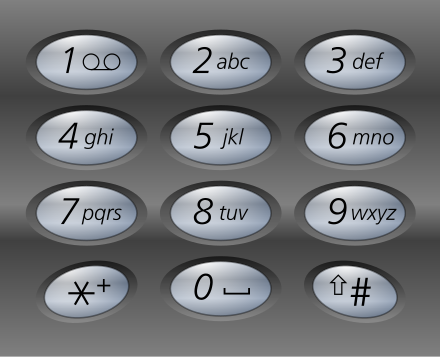

Наприклад, два слова hole та golf вводяться натисненням послідовності 4653. Як знайти інші слова, які можуть бути написані натисненням тієї самої послідовності клавіш? За допомогою регулярного виразу «^[ghi][mno][jlk][def]$» це зробити не складно:

In [ ]:
 [w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

['gold', 'golf', 'hold', 'hole']

Перша частина виразу, «^[ghi]», вказує на початок слова після якого йде один з символів g, h, чи i. Наступна частина виразу, «[mno]», містить другий символ m, n, або o. Обмеження на вибір третього та четвертого символів встановлюються аналогічно. Тільки чотири слова відповідають заданому шаблону. Порядок символів у квадратних дужках є довільним і не впливає на результат, наступний регулярний вираз «^[hig][nom][ljk][fed]$» дозволить отримати аналогічний результат.

Символ + може використовуватися як після окремих літер так й після послідовності літер у квадратних дужках:

In [16]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
print([w for w in chat_words if re.search('^m+i+n+e+$', w)])

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee', 'miiiiiinnnnnnnnnneeeeeeee', 'mine', 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']


In [17]:
print([w for w in chat_words if re.search('^[ha]+$', w)])

['a', 'aaaaaaaaaaaaaaaaa', 'aaahhhh', 'ah', 'ahah', 'ahahah', 'ahh', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'h', 'ha', 'haaa', 'hah', 'haha', 'hahaaa', 'hahah', 'hahaha', 'hahahaa', 'hahahah', 'hahahaha', 'hahahahaaa', 'hahahahahaha', 'hahahahahahaha', 'hahahahahahahahahahahahahahahaha', 'hahahhahah', 'hahhahahaha']


Символ + означає одне, або більше повторення: окремих символів, подібно до m, символів з набору, подібно до [fed], або символів з проміжку, подібно до [d-f]. Заміна + на символ * , який означає нуль або більше повторень - «^m*i*n*e*$» дозволить встановити відповідність до всіх слів, які знаходяться за допомогою виразу «^m+i+n+e+$», а також до слів де немає деяких літер, наприклад me, min, and mmmmm.
Оператор ^ виконує іншу функцію, якщо його записати першим символом в квадратних дужках. Наприклад вираз «[^aeiouAEIOU]» встановлює відповідність до будь-яких символів крім голосних. В корпусі NPS Chat Corpus можна знайти , за допомогою виразу «^[^aeiouAEIOU]+$» всі слова в яких повністю відсутні голосні : :):):), grrr, cyb3r , zzzzzzzz. Також сюди увійшли слова, які містять інші символи крім букв.
В наступних прикладах показані інші регулярні вирази для пошуку слів, які відповідають заданим шаблонам та показано використання символів: \, {}, (), та |:

In [18]:
wsj = sorted(set(nltk.corpus.treebank.words()))
print([w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)])

['0.0085', '0.05', '0.1', '0.16', '0.2', '0.25', '0.28', '0.3', '0.4', '0.5', '0.50', '0.54', '0.56', '0.60', '0.7', '0.82', '0.84', '0.9', '0.95', '0.99', '1.01', '1.1', '1.125', '1.14', '1.1650', '1.17', '1.18', '1.19', '1.2', '1.20', '1.24', '1.25', '1.26', '1.28', '1.35', '1.39', '1.4', '1.457', '1.46', '1.49', '1.5', '1.50', '1.55', '1.56', '1.5755', '1.5805', '1.6', '1.61', '1.637', '1.64', '1.65', '1.7', '1.75', '1.76', '1.8', '1.82', '1.8415', '1.85', '1.8500', '1.9', '1.916', '1.92', '10.19', '10.2', '10.5', '107.03', '107.9', '109.73', '11.10', '11.5', '11.57', '11.6', '11.72', '11.95', '112.9', '113.2', '116.3', '116.4', '116.7', '116.9', '118.6', '12.09', '12.5', '12.52', '12.68', '12.7', '12.82', '12.97', '120.7', '1206.26', '121.6', '126.1', '126.15', '127.03', '129.91', '13.1', '13.15', '13.5', '13.50', '13.625', '13.65', '13.73', '13.8', '13.90', '130.6', '130.7', '131.01', '132.9', '133.7', '133.8', '14.00', '14.13', '14.26', '14.28', '14.43', '14.5', '14.53', '14.54',

In [19]:
print([w for w in wsj if re.search('^[A-Z]+\$$', w)])

['C$', 'US$']


In [20]:
print([w for w in wsj if re.search('^[0-9]{4}$', w)])

['1614', '1637', '1787', '1901', '1903', '1917', '1925', '1929', '1933', '1934', '1948', '1953', '1955', '1956', '1961', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1975', '1976', '1977', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2005', '2009', '2017', '2019', '2029', '3057', '8300']


In [21]:
print([w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)])

['10-day', '10-lap', '10-year', '100-share', '12-point', '12-year', '14-hour', '15-day', '150-point', '190-point', '20-point', '20-stock', '21-month', '237-seat', '240-page', '27-year', '30-day', '30-point', '30-share', '30-year', '300-day', '36-day', '36-store', '42-year', '50-state', '500-stock', '52-week', '69-point', '84-month', '87-store', '90-day']


In [25]:
print([w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)])

['black-and-white', 'bread-and-butter', 'father-in-law', 'machine-gun-toting', 'savings-and-loan']


In [ ]:
print([w for w in wsj if re.search('(ed|ing)$', w)])

['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualized', 'Anything', 'Arbitrage-related', 'Arbitraging', 'Asked', 'Assuming', 'Atlanta-based', 'Baking', 'Banking', 'Beginning', 'Beijing', 'Being', 'Bermuda-based', 'Betting', 'Boeing', 'Broadcasting', 'Bucking', 'Buying', 'Calif.-based', 'Change-ringing', 'Citing', 'Concerned', 'Confronted', 'Conn.based', 'Consolidated', 'Continued', 'Continuing', 'Declining', 'Defending', 'Depending', 'Designated', 'Determining', 'Developed', 'Died', 'During', 'Encouraged', 'Encouraging', 'English-speaking', 'Estimated', 'Everything', 'Excluding', 'Exxon-owned', 'Faulding', 'Fed', 'Feeding', 'Filling', 'Filmed', 'Financing', 'Following', 'Founded', 'Fracturing', 'Francisco-based', 'Fred', 'Funded', 'Funding', 'Generalized', 'Germany-based', 'Getting', 'Guaranteed', 'Having', 'Heating', 'Heightened', 'Holding', 'Housing', 'Illuminating', 'Indeed', 'Indexing', 'Irving', 'Jersey-based', 'Judging', 'Know

Символ зворотної похилої риски (backslash) означає, що наступний метасимвол (спеціальний символ регулярного виразу) втрачає своє спеціальне значення. Отже \. означає просто крапку. Послідовність у фігурних дужках, подібна до {3,5}, вказує на кількість повторів. Вертикальна риска вказує на можливість вибору між елементами, які стоять справа і зліва від неї. Круглі дужки вказують на область дії оператора. Вони можуть використовуватися разом з вертикальною рискою (диз'юнкція), подібно до виразу «w(i|e|ai|oo)t», який встановлює відповідність до слів wit, wet, wait, та woot. 

Ось короткий перелік основних операторів регулярних виразів та дій, повʼязаних із ними.

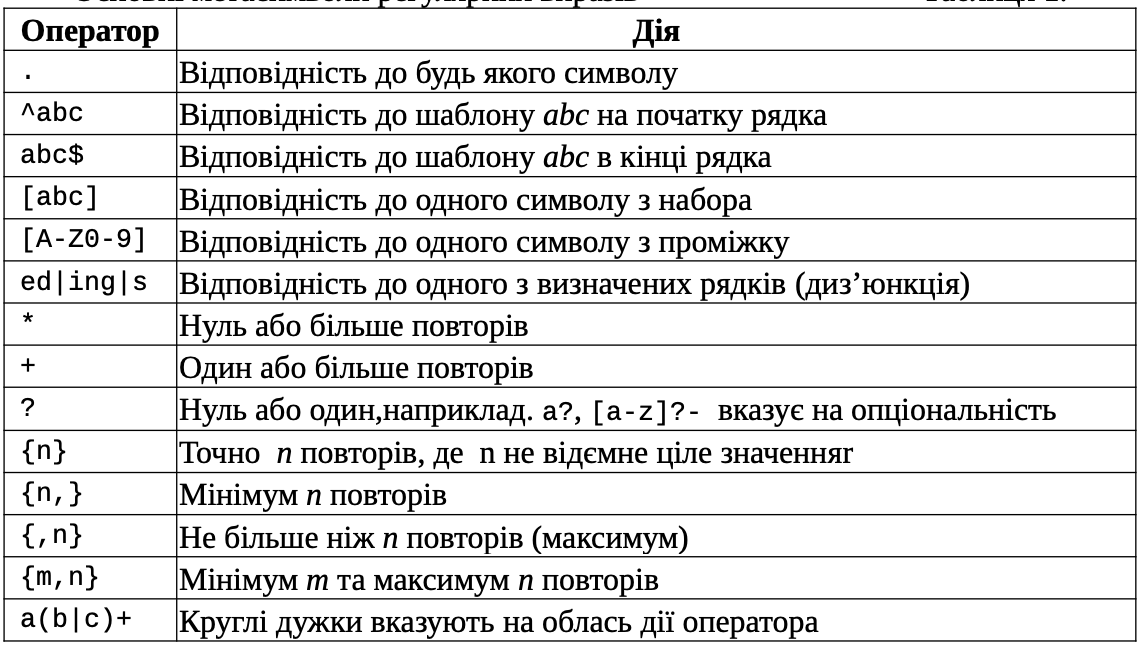

**ВАЖЛИВО**
Інтерпретатор Python обробляє регулярний вираз, як звичайний рядок. Якщо рядок містить зворотну косу риску то наступний після неї символ інтерпретується спеціальним способом. Наприклад \b буде інтерпретуватися як backspace символ. В загальному, якщо використовувати регулярні вирази з зворотними косими рисками, необхідно вказати інтерпретатору не обробляти цей рядок, а відразу віддати її на обробку модулю re. Це можна зробити додавши до регулярного виразу (рядка) префікс r. Наприклад, рядок r'\band\b' містить два символи \b, які інтерпретовані бібліотекою re відповідають границям слова а не символу backspace.

###5.3 Застосування регулярних виразів

Вираз re.search(regexp, w) дозволяє знаходити слова w , які відповідають регулярному виразу regexp . Регулярні вирази також можна використовувати для виявлення фрагментів слів, або для модифікації слів різними способами.

####5.3.1 Виявлення фрагментів слів

Метод re.findall() ("знайти все") дозволяє знайти всі відповідності даному регулярному виразу. В наступному прикладі показано знаходження та підрахунок всіх голосних літер:

In [ ]:
word = 'supercalifragilisticexpialidocious'
print(re.findall(r'[aeiou]', word))

['u', 'e', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']


In [ ]:
len(re.findall(r'[aeiou]', word))

16

Подібним способом можна знайти та побудувати частотний розподіл для послідовностей з двох і більше голосних в довільному тексті:

In [ ]:
wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj
  for vs in re.findall(r'[aeiou]{2,}', word))
fd.items()

dict_items([('ea', 476), ('oi', 65), ('ou', 329), ('io', 549), ('ee', 217), ('ie', 331), ('ui', 95), ('ua', 109), ('ai', 261), ('ue', 105), ('ia', 253), ('ei', 86), ('iai', 1), ('oo', 174), ('au', 106), ('eau', 10), ('oa', 59), ('oei', 1), ('oe', 15), ('eo', 39), ('uu', 1), ('eu', 18), ('iu', 14), ('aii', 1), ('aiia', 1), ('ae', 11), ('aa', 3), ('oui', 6), ('ieu', 3), ('ao', 6), ('iou', 27), ('uee', 4), ('eou', 5), ('aia', 1), ('uie', 3), ('iao', 1), ('eei', 2), ('uo', 8), ('uou', 5), ('eea', 1), ('ueui', 1), ('ioa', 1), ('ooi', 1)])

#### 5.3.2 Обробка фрагментів слів

Використавши re.findall() для виявлення фрагментів слів, можна спробувати обробляти ці фрагменти різними способами.

Існує думка, що англійска мова є надлишкова, оскільки текст зручно читати навіть опустивши у словах всі внутрішні голосні. Наприклад у словах, declaration - dclrtn, та inalienable - inlnble, залишились голосні тільки на початку та у кінці слова. Регулярний вираз у наступному виразі встановлює відповідність до початкових послідовностей голосних, кінцевих послідовностей голосних та всіх приголосних, а всі інші символи ігноруються. Метод re.findall() використовується для виявлення фрагментів слів а метод ''.join() для їх поєднання.

In [26]:
regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
def compress(word):
  return ''.join(re.findall(regexp, word))
english_udhr = nltk.corpus.udhr.words('English-Latin1')
nltk.tokenwrap(compress(w) for w in english_udhr[:75])

'Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and\nof the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn\nof frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn\nrghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,\nand the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and'

В наступному прикладі показано спільне використання регулярного виразу та умовного частотного розподілу. В програмі зі слів мовою Rotokas вилучаються всі послідовності приголосна – голосна. Оскільки вилучаються пари то на їх основі можна побудувати умовний частотний розподіл й представити його у вигляді таблиці:

In [ ]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


Переглянувши рядки s та t, бачимо що ці приголосні утворюють цілком окремі фонеми в цій мові. Літеру s можна видалити з абетки Rotokas і записати правило, що літера t вимовляється як s перед i. (Тільки одне слово kasuari містить su, оскільки це запозичення з англійської,
'cassowary' ).
Для перегляду слів , які відповідають тим чи іншим послідовностям приголосна – голосна зручно побудувати структуру де слова згруповані за тими послідовностями, які в них зустрічаються. Цього можна досягнути наступним чином:

In [ ]:
cv_word_pairs = [(cv, w) for w in rotokas_words
                  for cv in re.findall(r'[ptksvr][aeiou]', w)]
cv_index = nltk.Index(cv_word_pairs)
print(cv_index['su'])

['kasuari']


In [ ]:
print(cv_index['po'])

['kaapo', 'kaapopato', 'kaipori', 'kaiporipie', 'kaiporivira', 'kapo', 'kapoa', 'kapokao', 'kapokapo', 'kapokapo', 'kapokapoa', 'kapokapoa', 'kapokapora', 'kapokapora', 'kapokaporo', 'kapokaporo', 'kapokari', 'kapokarito', 'kapokoa', 'kapoo', 'kapooto', 'kapoovira', 'kapopaa', 'kaporo', 'kaporo', 'kaporopa', 'kaporoto', 'kapoto', 'karokaropo', 'karopo', 'kepo', 'kepoi', 'keposi', 'kepoto']


В цьому фрагменті програми обробляється кожне слово, для якого здійснюється пошук підрядків, які відповідають регулярному виразу «[ptksvr][aeiou]». У випадку слова kasuari, будуть знайдені ka, su та ri і список cv_word_pairs буде містити ('ka', 'kasuari'), ('su', 'kasuari') та ('ri', 'kasuari').

#### 5.3.3 Встановлення основ слів (стемінг)

Для обробки мови часто буває необхідно опустити закінчення слів і працювати тільки з їх основами. Існують різні способи встановлення основи слова. Найпростіший спосіб, це відкидання будь-яких послідовностей, які нагадують суфікс

In [ ]:
def stem(word):
  for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's',
'ment']:
    if word.endswith(suffix):
      return word[:-len(suffix)]
  return word

Подібний результат можна отримати за допомогою регулярних виразів. Спочатку потрібно розробити вираз із диз’юнкцією де записати всі суфікси та використати круглі дужки для вказання області дії операції диз’юнкції.

In [ ]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

Тут, re.findall() знаходить тільки суфікс, хоча регулярний вираз відповідає всьому слову. Це сталося тому, що круглі дужки задають не тільки область дії оператора диз’юнкції, але і виконують функцію вибору підрядка який потрібно вилучити. У випадку, якщо потрібно в регулярному виразі використовувати круглі дужки для вказання області дії оператор, але не потрібно здійснювати вилучення, в регулярний вираз потрібно додати ?:, так як у наступному прикладі.

In [ ]:
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

Оскільки, потрібно поділити слово на основу і суфікс та показати ці частини, то доцільно їх виділити в регулярному виразі за допомогою круглих дужок:

In [ ]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

[('process', 'ing')]

Спробуємо аналогічно обробити інше слово, наприклад , processes:

In [ ]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('processe', 's')]

Регулярний вираз помилково знайшов суфікс -s замість суфікса -es . Оператор * в частині виразу «.*» приводить до поглинання максимальної кількості символів. Доцільно використати вираз *?, який дозволяє уникнути цього ефекту:

In [ ]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('process', 'es')]

Даний регулярний вираз працює навіть зі словами з відсутнім суфіксом:

In [ ]:
 re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', 'language')

[('language', '')]

Звичайно цей підхід має ще багато інших проблем. Для їх виявлення розроблена функція для здійснення операції стемінгу. За її допомогою можна опрацьовувати довільний текст:

In [ ]:
def stem(word):
  regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
  stem, suffix = re.findall(regexp, word)[0]
  return stem

raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government. Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = nltk.word_tokenize(raw)
print(*[stem(t) for t in tokens])

DENNIS : Listen , strange women ly in pond distribut sword i no basi for a system of govern . Supreme execut power deriv from a mandate from the mass , not from some farcical aquatic ceremony .


Потрібно зазначити, що регулярний вираз видалив s не тільки зі слова ponds а також зі слів is та basis. Також утворені слова невластиві мові distribut та deriv, хоча ці основи прийнятні для певного застосування .

#### 5.3.4 Пошук у токенізованому тексті

Спеціальний тип регулярних виразів може використовуватися для пошуку серед слів у тексті (текст – послідовність окремих слів). Наприклад, за допомогою виразу "\<a> \<man>" можна знайти всі випадки вживання a та man в тексті. Кутові дужки використовуються для позначення меж а всі пробіли між цими дужками ігноруються (індивідуальна особливість NLTK's findall() методу для тексту). Наступний приклад містить <.*> #1 для виявлення всіх окремих слів, а круглі дужки дозволять вибрати ці слова окремо від словосполучень (a monied man). Інший приклад дозволяє знайти всі словосполучення з трьох слів де останнє слово bro #2. Останній приклад це знаходження послідовностей з трьох і більше слів , які починаються з літери l #3.

In [ ]:
from nltk.corpus import gutenberg, nps_chat
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r"<a> (<.*>) <man>") #1
chat = nltk.Text(nps_chat.words())

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


In [ ]:
chat.findall(r"<.*> <.*> <bro>") #2

you rule bro; telling you bro; u twizted bro


In [ ]:
chat.findall(r"<l.*>{3,}") #3

lol lol lol; lmao lol lol; lol lol lol; la la la la la; la la la; la
la la; lovely lol lol love; lol lol lol.; la la la; la la la


Побудова пошукових шаблонів для вивчення лінгвістичних явищ, які пов’язані зі словами не є складною. Чи можна будувати складніші шаблони на основі регулярних виразів? Наприклад, для знаходження в корпусі текстів словозворотів таких, як x and other ys , які дозволяють дослідити гіперніми, можна розробити наступний фрагмент програми

In [ ]:
from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))
hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals


При достатніх об’ємах лінгвістичних даних дана програма дозволяє зібрати інформацію про таксономію об’єктів без додаткової ручної праці. Звичайно, результати роботи програми містять і хибні результати, якими потрібно нехтувати. Наприклад, результат: demands and other factors вказує на те що demand це тип factor, але в цьому реченні йдеться про збільшення заробітної плати (wage demands).

### 5.4 Використання регулярних виразів для токенізації тексту

Регулярні вирази дозволяють також здійснювати токенізацію текстів та контролювати
процес токенізації. 

#### 5.4.1 Найпростіший токенізатор

Найпростіший спосіб токенізації тексту – це поділ його за пробілами. Розглянемо наступний текст з Alice's Adventures in Wonderland:

In [ ]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
well without--Maybe it's always pepper that makes people hot-tempered,'..."""

Можна розділити цей текст за пробілами скориставшись raw.split(). Реалізовуючи те саме за допомогою регулярних виразів, недостатньо встановити відповідність до всіх символів пробілів #1. Оскільки, рядок з текстом містить символ \n, потрібно враховувати будь-яку кількість пробілів табуляцій та символів нового рядка #2:

In [ ]:
 re.split(r' ', raw) #1

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone\nthough),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very\nwell',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

In [ ]:
 re.split(r'[ \t\n]+', raw) #2

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

Регулярний вираз «[ \t\n]+» встановлює відповідність одному, або більше пробілам, табуляціям (\t) чи символам нового рядка (\n). Інші символи пробілів, такі як «Enter» «нова сторінка» також повинні враховуватися. Замість того щоб доавати нові елементи до регулярного виразу, можна використати властивий re символ, \s, який означає будь-який символ пробілу. Вираз із попереднього прикладу буде переписаний наступним чином re.split(r'\s+', raw). 

Поділ тексту на окремі слова за пробілами дає очікувані помилкові результати '(not' та 'herself,'. Python підтримує символ \w , якому відповідає клас символів слів аналогічних до [azA-Z0-9_], та символ \W , який визначає клас символів – всі символи не літери, не цифри й не підкреслення. Можна використати \W в регулярному виразі для поділу вхідного тексту на окремі слова за будь якими символами відмінним від символів з яких складаються слова:

In [ ]:
re.split(r'\W+', raw)[:20]

['',
 'When',
 'I',
 'M',
 'a',
 'Duchess',
 'she',
 'said',
 'to',
 'herself',
 'not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 'I',
 'won',
 't']

Результати використання цього регулярного виразу містять пусті рядки на початку і в кінці списку (спробуйте 'xx'.split('x')). Аналогічні слова, але без додаткових пустих рядків можна отримати використавши re.findall(r'\w+', raw), де шаблону відповідають всі слова замість пробілів. Наступний регулярний вираз «\w+|\S\w*» дозволяє охопити більшу кількість різних випадків. Спочатку цей вираз встановлює відповідність до будь-яких послідовностей символів слів, далі, якщо відповідностей більше немає, встановлюється відповідність до всіх символів, які не є символами пробілу (\S) і зустрічаються перед символами слів. Такий підхід дозволяє відділяти розділові знаки разом з літерою перед якою вони йдуть (наприклад 's), але послідовності двох і більше розділових знаків розділені.

In [ ]:
re.findall(r'\w+|\S\w*', raw)[:20]

["'When",
 'I',
 "'M",
 'a',
 'Duchess',
 ',',
 "'",
 'she',
 'said',
 'to',
 'herself',
 ',',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 ')']

Для виявлення слів з дефісом або апострофом вираз \w+ потрібно розширити до: «\w+ ([-']\w+)*». Цей вираз означає, що після \w+ може йти нуль, або більше випадків [-']\w+; що дозволить виділити слова hot-tempered або it's. Символи ?: також потрібно додати до регулярного виразу, разом з шаблоном для виявлення символів лапок.

In [ ]:
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw))

["'", 'When', "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'", 'I', "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'", '...']


Частина виразу «[-.(]+» дозволяє виявити подвійний дефіс, еліпсис а також відкриту дужку.

Ось таблиця символів в регулярних виразах. 

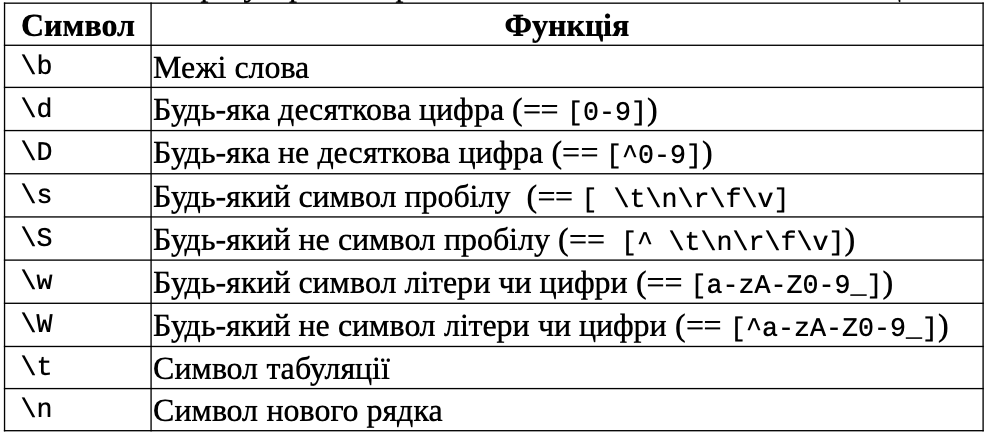

#### 5.4.2 Проблеми токенізації тексту

Токенізація - це доволі складне завдання, яке часто не має однозначного розв’язку. Спосіб токенізації та правила, що вважати окремим словом вибираються в залежності від предметної області.

Для полегшення розробки токенізаторів існує можливість доступу до текстів, які токенізовані вручну. Порівнюючи результати токенізації з таким «gold-standard» токенізатором можна оцінити якість роботи програми. Набір корпусів NLTK містить приклади Penn Treebank , а саме тексти Wall Street Journal (nltk.corpus.treebank_raw.raw()) та їх токенізовану версію (nltk.corpus.treebank.words()).